这篇论文用了比较简单的方法。
- http://ceur-ws.org/Vol-1094/bioasq2013_submission_8.pdf

我们的思路可以类似：
1. 拆分成10个问题。分别做feature的score
2. 对feature score取最大值或者平均值，作为feature在multi-label情况下的score
3. 选择出对于10个label来说，最关联的几个feature。

In [1]:
%pylab inline
%matplotlib inline
from sklearn import cross_validation
import pandas as pd
store = pd.HDFStore('store.h5')
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'


Populating the interactive namespace from numpy and matplotlib


In [2]:
store

<class 'pandas.io.pytables.HDFStore'>
File path: store.h5
/data                                  frame        (shape->[1000,9443]) 
/feature_score                         series       (shape->[28329])     
/feature_score_for_0                   series       (shape->[28329])     
/feature_score_for_1                   series       (shape->[28329])     
/feature_score_for_2                   series       (shape->[28329])     
/feature_score_for_3                   series       (shape->[28329])     
/feature_score_for_4                   series       (shape->[28329])     
/feature_score_for_5                   series       (shape->[28329])     
/feature_score_for_6                   series       (shape->[28329])     
/feature_score_rf                      series       (shape->[28329])     
/feature_selected_data                 frame        (shape->[1000,3232]) 
/feature_selected_data_rf              frame        (shape->[1000,11717])
/gene_info                             frame        (s

(1000, 28329) (1000,)


(array([ 500.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,  500.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

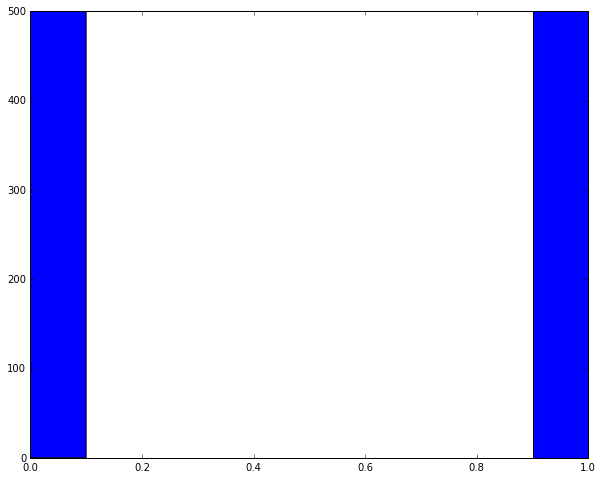

In [3]:
X = store['onehot_data']
y = store['multilabel'][0].as_matrix()
print X.shape, y.shape
hist(y)

分别对10个label使用 stability selection的方法，计算feature的score。

In [ ]:
%%time
from sklearn.linear_model import RandomizedLogisticRegression
scores = []
for i in range(10):
    y = store['multilabel'][i].as_matrix()
    print 'label ',i
    with warnings.catch_warnings():
        warnings.simplefilter('ignore', DeprecationWarning)
        clf = RandomizedLogisticRegression().fit(X,y)
    scores.append(clf.scores_)
scores_df = pd.DataFrame(scores)

In [ ]:
scores_df

In [4]:
scores_df=store['multilabel-feat-importance']


In [5]:
weidian_imp = pd.DataFrame()
for i in range(scores_df.shape[1]/3):
    weidian_imp[i] = scores_df[3*i]+scores_df[3*i+1]+scores_df[3*i+2]
weidian_imp 

,0,1,2,3,4,5,6,7,8,9,...,9433,9434,9435,9436,9437,9438,9439,9440,9441,9442
0,0.015,0.000,0.0,0.090,0.0,0.025,0.010,0.000,0.0,0.000,...,0.000,0.000,0.025,0.000,0.005,0.035,0.000,0.000,0.000,0.000
1,0.015,0.035,0.0,0.005,0.0,0.005,0.000,0.000,0.0,0.050,...,0.005,0.005,0.000,0.000,0.000,0.000,0.000,0.005,0.000,0.010
2,0.015,0.055,0.0,0.020,0.0,0.080,0.005,0.000,0.0,0.015,...,0.000,0.000,0.005,0.000,0.000,0.000,0.000,0.085,0.000,0.000
3,0.005,0.000,0.0,0.095,0.0,0.000,0.000,0.005,0.0,0.000,...,0.055,0.000,0.000,0.010,0.000,0.000,0.000,0.000,0.000,0.005
4,0.005,0.035,0.0,0.035,0.0,0.005,0.000,0.000,0.0,0.000,...,0.000,0.000,0.005,0.000,0.000,0.005,0.000,0.030,0.000,0.000
5,0.015,0.000,0.0,0.010,0.0,0.010,0.000,0.000,0.0,0.000,...,0.000,0.000,0.000,0.085,0.000,0.000,0.000,0.000,0.000,0.000
6,0.015,0.005,0.0,0.140,0.0,0.030,0.050,0.025,0.0,0.035,...,0.000,0.000,0.000,0.000,0.000,0.005,0.000,0.000,0.000,0.000
7,0.005,0.005,0.0,0.195,0.0,0.000,0.000,0.000,0.0,0.020,...,0.000,0.000,0.000,0.025,0.000,0.000,0.005,0.000,0.000,0.000
8,0.015,0.000,0.0,0.035,0.0,0.025,0.000,0.000,0.0,0.225,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.015,0.005,0.000
9,0.045,0.045,0.0,0.040,0.0,0.010,0.020,0.000,0.0,0.245,...,0.000,0.000,0.000,0.005,0.000,0.000,0.020,0.005,0.000,0.005


In [6]:
simp = sum(weidian_imp,axis=1)
print simp
for i in range(10):
    weidian_imp.iloc[i,:]=weidian_imp.iloc[i,:]/simp[i]
print sum(weidian_imp,axis=1)

0    106.385
1    105.215
2    104.275
3    102.515
4    102.710
5    103.955
6    104.460
7    105.250
8    102.445
9    106.045
dtype: float64
0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
5    1.0
6    1.0
7    1.0
8    1.0
9    1.0
dtype: float64


In [7]:
weidian_imp

,0,1,2,3,4,5,6,7,8,9,...,9433,9434,9435,9436,9437,9438,9439,9440,9441,9442
0,0.000141,0.000000,0.0,0.000846,0.0,0.000235,0.000094,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000235,0.000000,0.000047,0.000329,0.000000,0.000000,0.000000,0.000000
1,0.000143,0.000333,0.0,0.000048,0.0,0.000048,0.000000,0.000000,0.0,0.000475,...,0.000048,0.000048,0.000000,0.000000,0.000000,0.000000,0.000000,0.000048,0.000000,0.000095
2,0.000144,0.000527,0.0,0.000192,0.0,0.000767,0.000048,0.000000,0.0,0.000144,...,0.000000,0.000000,0.000048,0.000000,0.000000,0.000000,0.000000,0.000815,0.000000,0.000000
3,0.000049,0.000000,0.0,0.000927,0.0,0.000000,0.000000,0.000049,0.0,0.000000,...,0.000537,0.000000,0.000000,0.000098,0.000000,0.000000,0.000000,0.000000,0.000000,0.000049
4,0.000049,0.000341,0.0,0.000341,0.0,0.000049,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000049,0.000000,0.000000,0.000049,0.000000,0.000292,0.000000,0.000000
5,0.000144,0.000000,0.0,0.000096,0.0,0.000096,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000818,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000144,0.000048,0.0,0.001340,0.0,0.000287,0.000479,0.000239,0.0,0.000335,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000048,0.000000,0.000000,0.000000,0.000000
7,0.000048,0.000048,0.0,0.001853,0.0,0.000000,0.000000,0.000000,0.0,0.000190,...,0.000000,0.000000,0.000000,0.000238,0.000000,0.000000,0.000048,0.000000,0.000000,0.000000
8,0.000146,0.000000,0.0,0.000342,0.0,0.000244,0.000000,0.000000,0.0,0.002196,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000146,0.000049,0.000000
9,0.000424,0.000424,0.0,0.000377,0.0,0.000094,0.000189,0.000000,0.0,0.002310,...,0.000000,0.000000,0.000000,0.000047,0.000000,0.000000,0.000189,0.000047,0.000000,0.000047


两个方案，计算max或计算average

In [8]:
weidian_imp_max = np.max(weidian_imp)
weidian_imp_mean = mean(weidian_imp)

weidian_imp_max_idx = np.argsort(weidian_imp_max)[::-1]
weidian_imp_mean_idx = np.argsort(weidian_imp_mean)[::-1]

print weidian_imp_max.shape, weidian_imp_mean.shape

(9443,) (9443,)


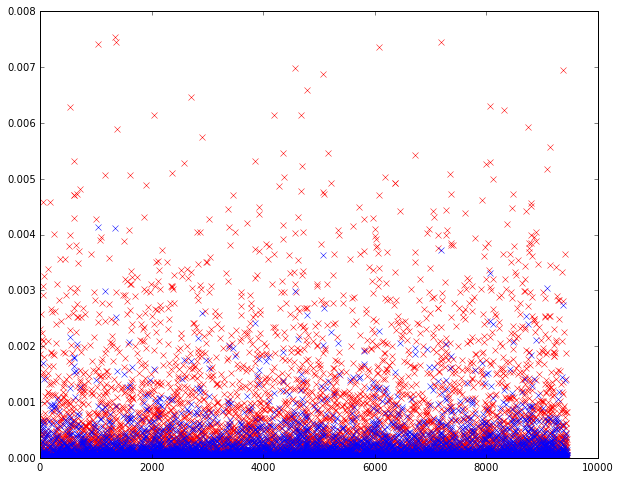

In [9]:
plot(weidian_imp_max,'rx',weidian_imp_mean,'bx')

<Container object of 100 artists>

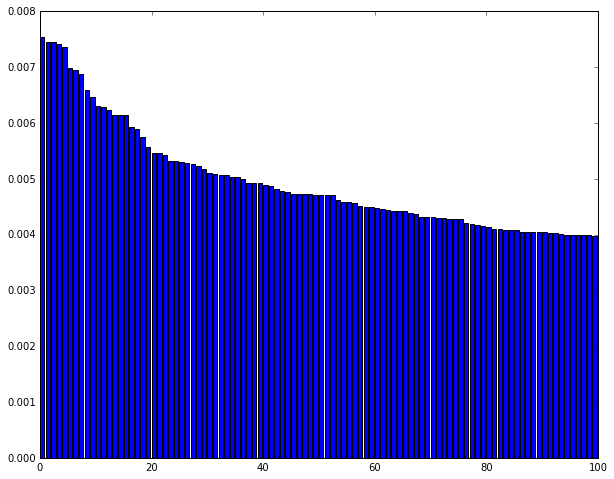

In [10]:
N=100
bar(range(N),weidian_imp_max[weidian_imp_max_idx][0:N])

<Container object of 100 artists>

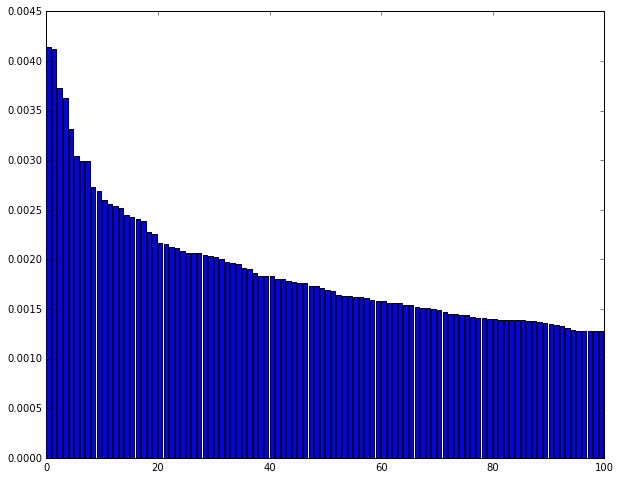

In [11]:
N=100
bar(range(N),weidian_imp_mean[weidian_imp_mean_idx][0:N])

In [ ]:
print weidian_imp_mean_idx.as_matrix().T[0:15]
print weidian_imp_max_idx.as_matrix().T[0:15]

In [ ]:
store

In [ ]:
store.close()

In [ ]:
weidian_imp_max = np.max(weidian_imp)

In [ ]:
for i in weidian_imp_max_idx[:10]:
    print(weidian[i],weidian_imp_max.values[i])

In [ ]:
for i in weidian_imp_mean_idx[:10]:
    print(weidian[i],weidian_imp_mean.values[i])

In [ ]:
store=pd.HDFStore('./store.h5')

In [ ]:
weidian = store['data'].columns

In [ ]:
weidian.shape

'rs3218121'，'rs351617'，'rs12746773'，'rs7515988'，'rs7538876'